# ISLR- Python: Ch3 -- Applied Question 8

- [Load Data](#Load-Data)
- [Construct Linear Estimate](#Construct-Linear-Estimate)
- [Describe Predictor/Response Relationship](#Describe-Predictor/Response-Relationship)
- [Plot Data and Estimate](#Plot-Data-and-Estimate)
- [Perform Estimate Diagnostics](#Perform-Estimate-Diagnostics)

In [6]:
# perform standard imports
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

## Load Data

In [7]:
auto_df = pd.read_csv('../../../data/Auto.csv',na_values='?')
auto_df = auto_df.dropna() # drop rows with na values
print(len(auto_df.mpg),'rows')
auto_df.head()

392 rows


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


## Construct Linear Estimate

In [8]:
# construct desgin matrix, model and fit
X = sm.add_constant(auto_df.horsepower)
y = auto_df.mpg
model = sm.OLS(y,X)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           7.03e-81
Time:                        20:20:17   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

## Describe Predictor/Response Relationship

#### (i) There is a negative relationship between horsepower and miles/gallon
#### (ii) The relationship between hp and mpg is strong (p-value ~ 0)
#### (iii) Negative slope term
#### (iv) At 98 hp the predicted mpg is ~ 24.5 mpg

## Plot Data and Estimate

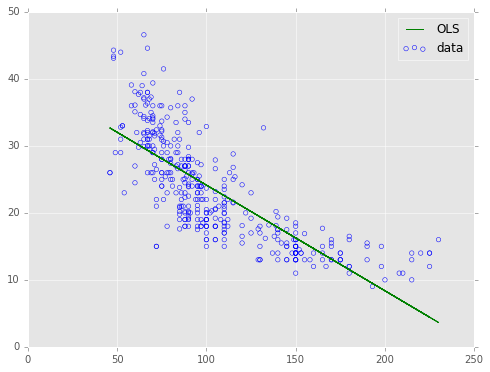

In [9]:
# plot the data and the estimate
fig,ax = plt.subplots(figsize=(8,6))
# scatter data
ax.scatter(X.horsepower.values,y.values, facecolors='none', edgecolors='b', label="data")
# plot estimate
ax.plot(X.horsepower.values, estimate.fittedvalues, 'g', label="OLS")
ax.legend(loc='best');

## Perform Estimate Diagnostics

#### Plot the residuals, studentized residuals and the leverages.

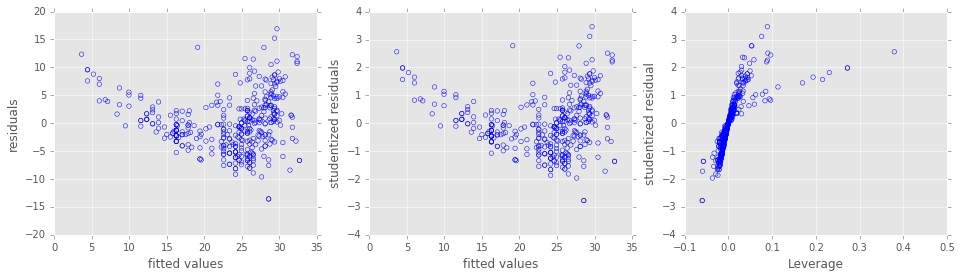

In [11]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');

#### The residuals show a clear U-shape indicating a poor fit at the extremes of the fitted data. The studentized residuals show two outliers (>3) and the leverage plot has several values >> (p+1)/n=.005 indicating high leverages which are altering the regression estimate. A quadratic fit (mpg~horsepower**2) is clearly more appropriate.